# Predicting Graduate Admissions using Linear Regression and Ridge Regression

## Aim
The aim of this project is to predict the chance of admission of a new student based on the above parameters using Linear Regression and Ridge Regression.

## Introduction 

The prediction of graduate admission is the process of predicting the chance of admission of a new student based on the datasets parameters using Regression Model. The prediction of graduate admission is important because it helps the student to know the chance of admission in a particular university based on the parameters like GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research.

## Data Understanding

The dataset contains 500 rows and 9 columns. The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :

| <table> || <tr> || <th>Column Name</th> | <th>Description</th> |
| </tr> || <tr> || <td>GRE Score</td>  | <td>GRE Score is the score of the student in the GRE exam which is out of 340.</td>|
| </tr> || <tr> || <td>TOEFL Score</td>  | <td>TOEFL Score is the score of the student in the TOEFL exam which is out of 120.</td>|
| </tr> || <tr> || <td>University Rating</td>  | <td>University Rating is the rating of the university in which the student wants to take admission.</td>|
| </tr> || <tr> || <td>SOP</td>  | <td>SOP is the Statement of Purpose of the student which is out of 5.</td>|
| </tr> || <tr> || <td>LOR</td>  | <td>LOR is the Letter of Recommendation of the student which is out of 5.</td>|
| </tr> || <tr> || <td>CGPA</td>  | <td>CGPA is the CGPA of the student in the undergraduate course which is out of 10.</td>|
| </tr> || <tr> || <td>Research</td>  | <td>Research is the research experience of the student which is either 0 or 1.</td>|
| </tr> || <tr> || <td>Chance of Admit</td>  | <td>Chance of Admit is the chance of admission of the student in the university which is 0 to 1.</td>|
| </tr> || <tr> || <td>Serial No.</td>  | <td>Serial No. is the serial number of the student which is out of 500.</td>|
| </tr> || --- | --- || </table> |


## Data Preparation

- Data cleaning: The dataset contains no missing values and no duplicate values.
- Data transformation: The dataset contains no categorical values.
- Data scaling: The dataset contains no outliers, The data contains features with different scales. The data is scaled to bring all the features to the same scale.

## Modeling

The dataset is split into training and testing sets. The training set contains 80% of the data and the testing set contains 20% of the data. The training set is used to train the Regression models and the testing set is used to test the Regression models. The Regression models are used to predict the chance of admission of a new student based on the above parameters. 

## Evaluation

The evaluation metrics used to evaluate the Regression models are Mean Squared Error, R-squared, Root Mean Squared Error, Explained Variance Score, Max Error.

<hr>

## Import Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, max_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head(5).T

,0,1,2,3,4
Serial No.,1.00,2.00,3.00,4.00,5.00
GRE Score,337.00,324.00,316.00,322.00,314.00
TOEFL Score,118.00,107.00,104.00,110.00,103.00
University Rating,4.00,4.00,3.00,3.00,2.00
SOP,4.50,4.00,3.00,3.50,2.00
LOR,4.50,4.50,3.50,2.50,3.00
CGPA,9.65,8.87,8.00,8.67,8.21
Research,1.00,1.00,1.00,1.00,0.00
Chance of Admit,0.92,0.76,0.72,0.80,0.65


In [3]:
# Check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
# Check the descriptive statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


## Data Cleaning

In [5]:
# Check for missing values and duplicated values
print(df.isnull().sum(),'\n')
print('Duplicated',df.duplicated().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64 

Duplicated 0


In [6]:
# Drop the 'Serial No.' column and rename the columns
df.drop(columns=['Serial No.'],inplace=True)
df.rename(columns={'Chance of Admit ':'Admit_Chance', 'GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'Uni_Rating'},inplace=True)

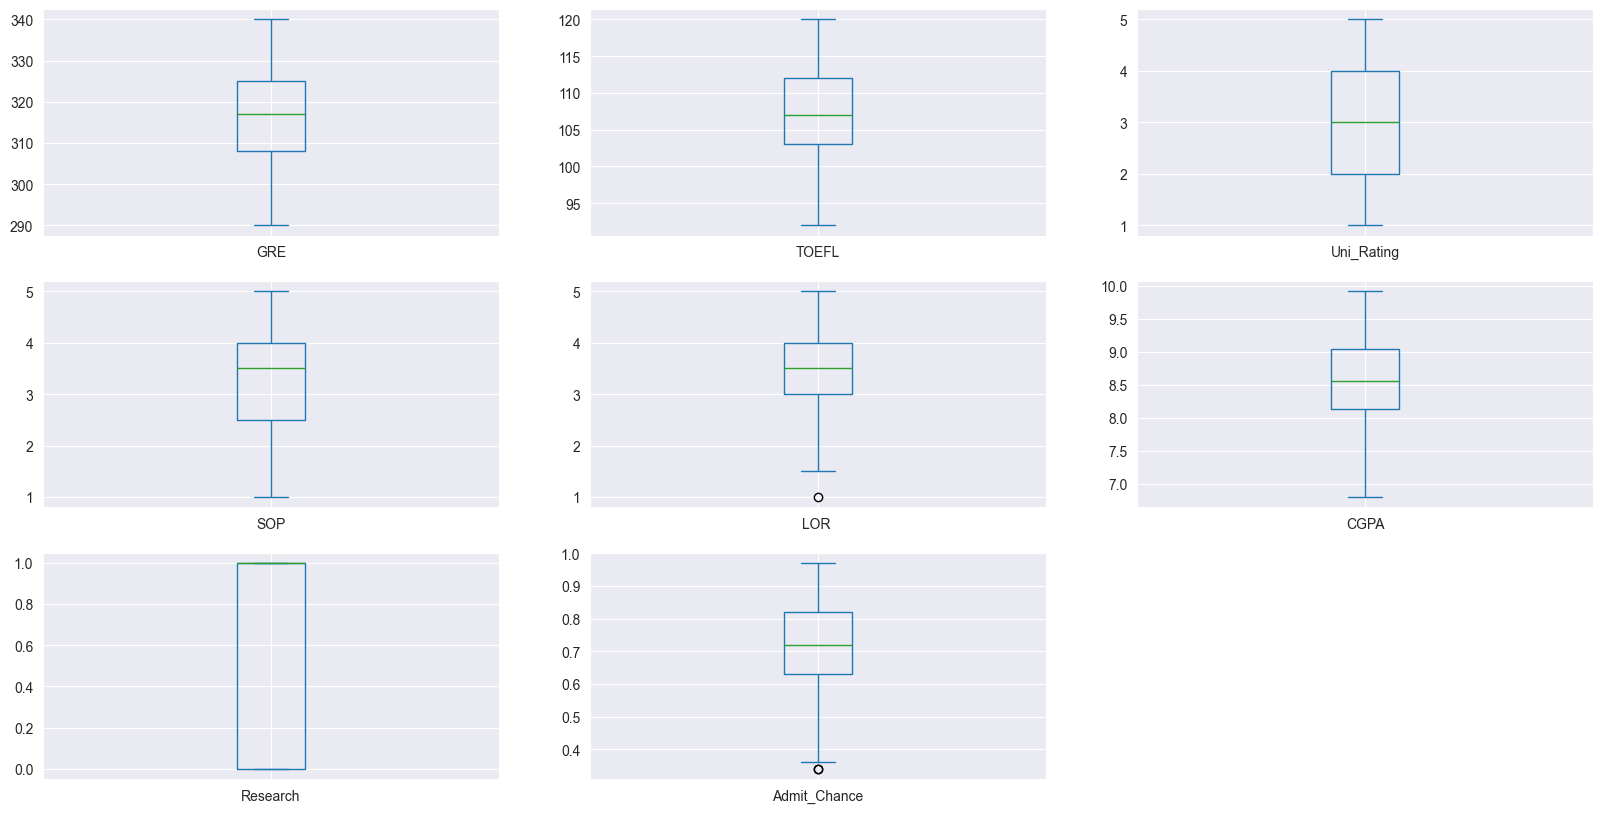

In [7]:
# Check the outliers
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(20,10))
plt.show()

## Data Correlation

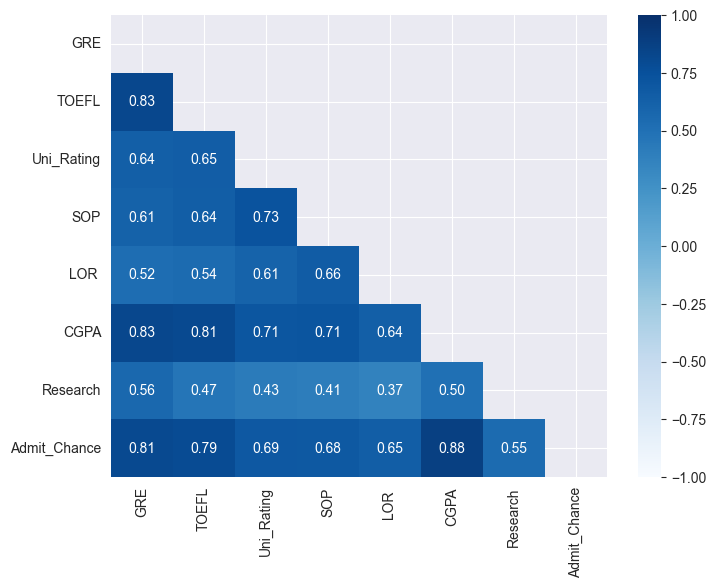

In [8]:
# Check the correlation between the features
plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(df.corr(),dtype=bool))
sns.heatmap(df.corr(),annot=True,mask=mask,fmt='.2f',cmap='Blues',vmin=-1,vmax=1)
plt.show()

## Data Visualization

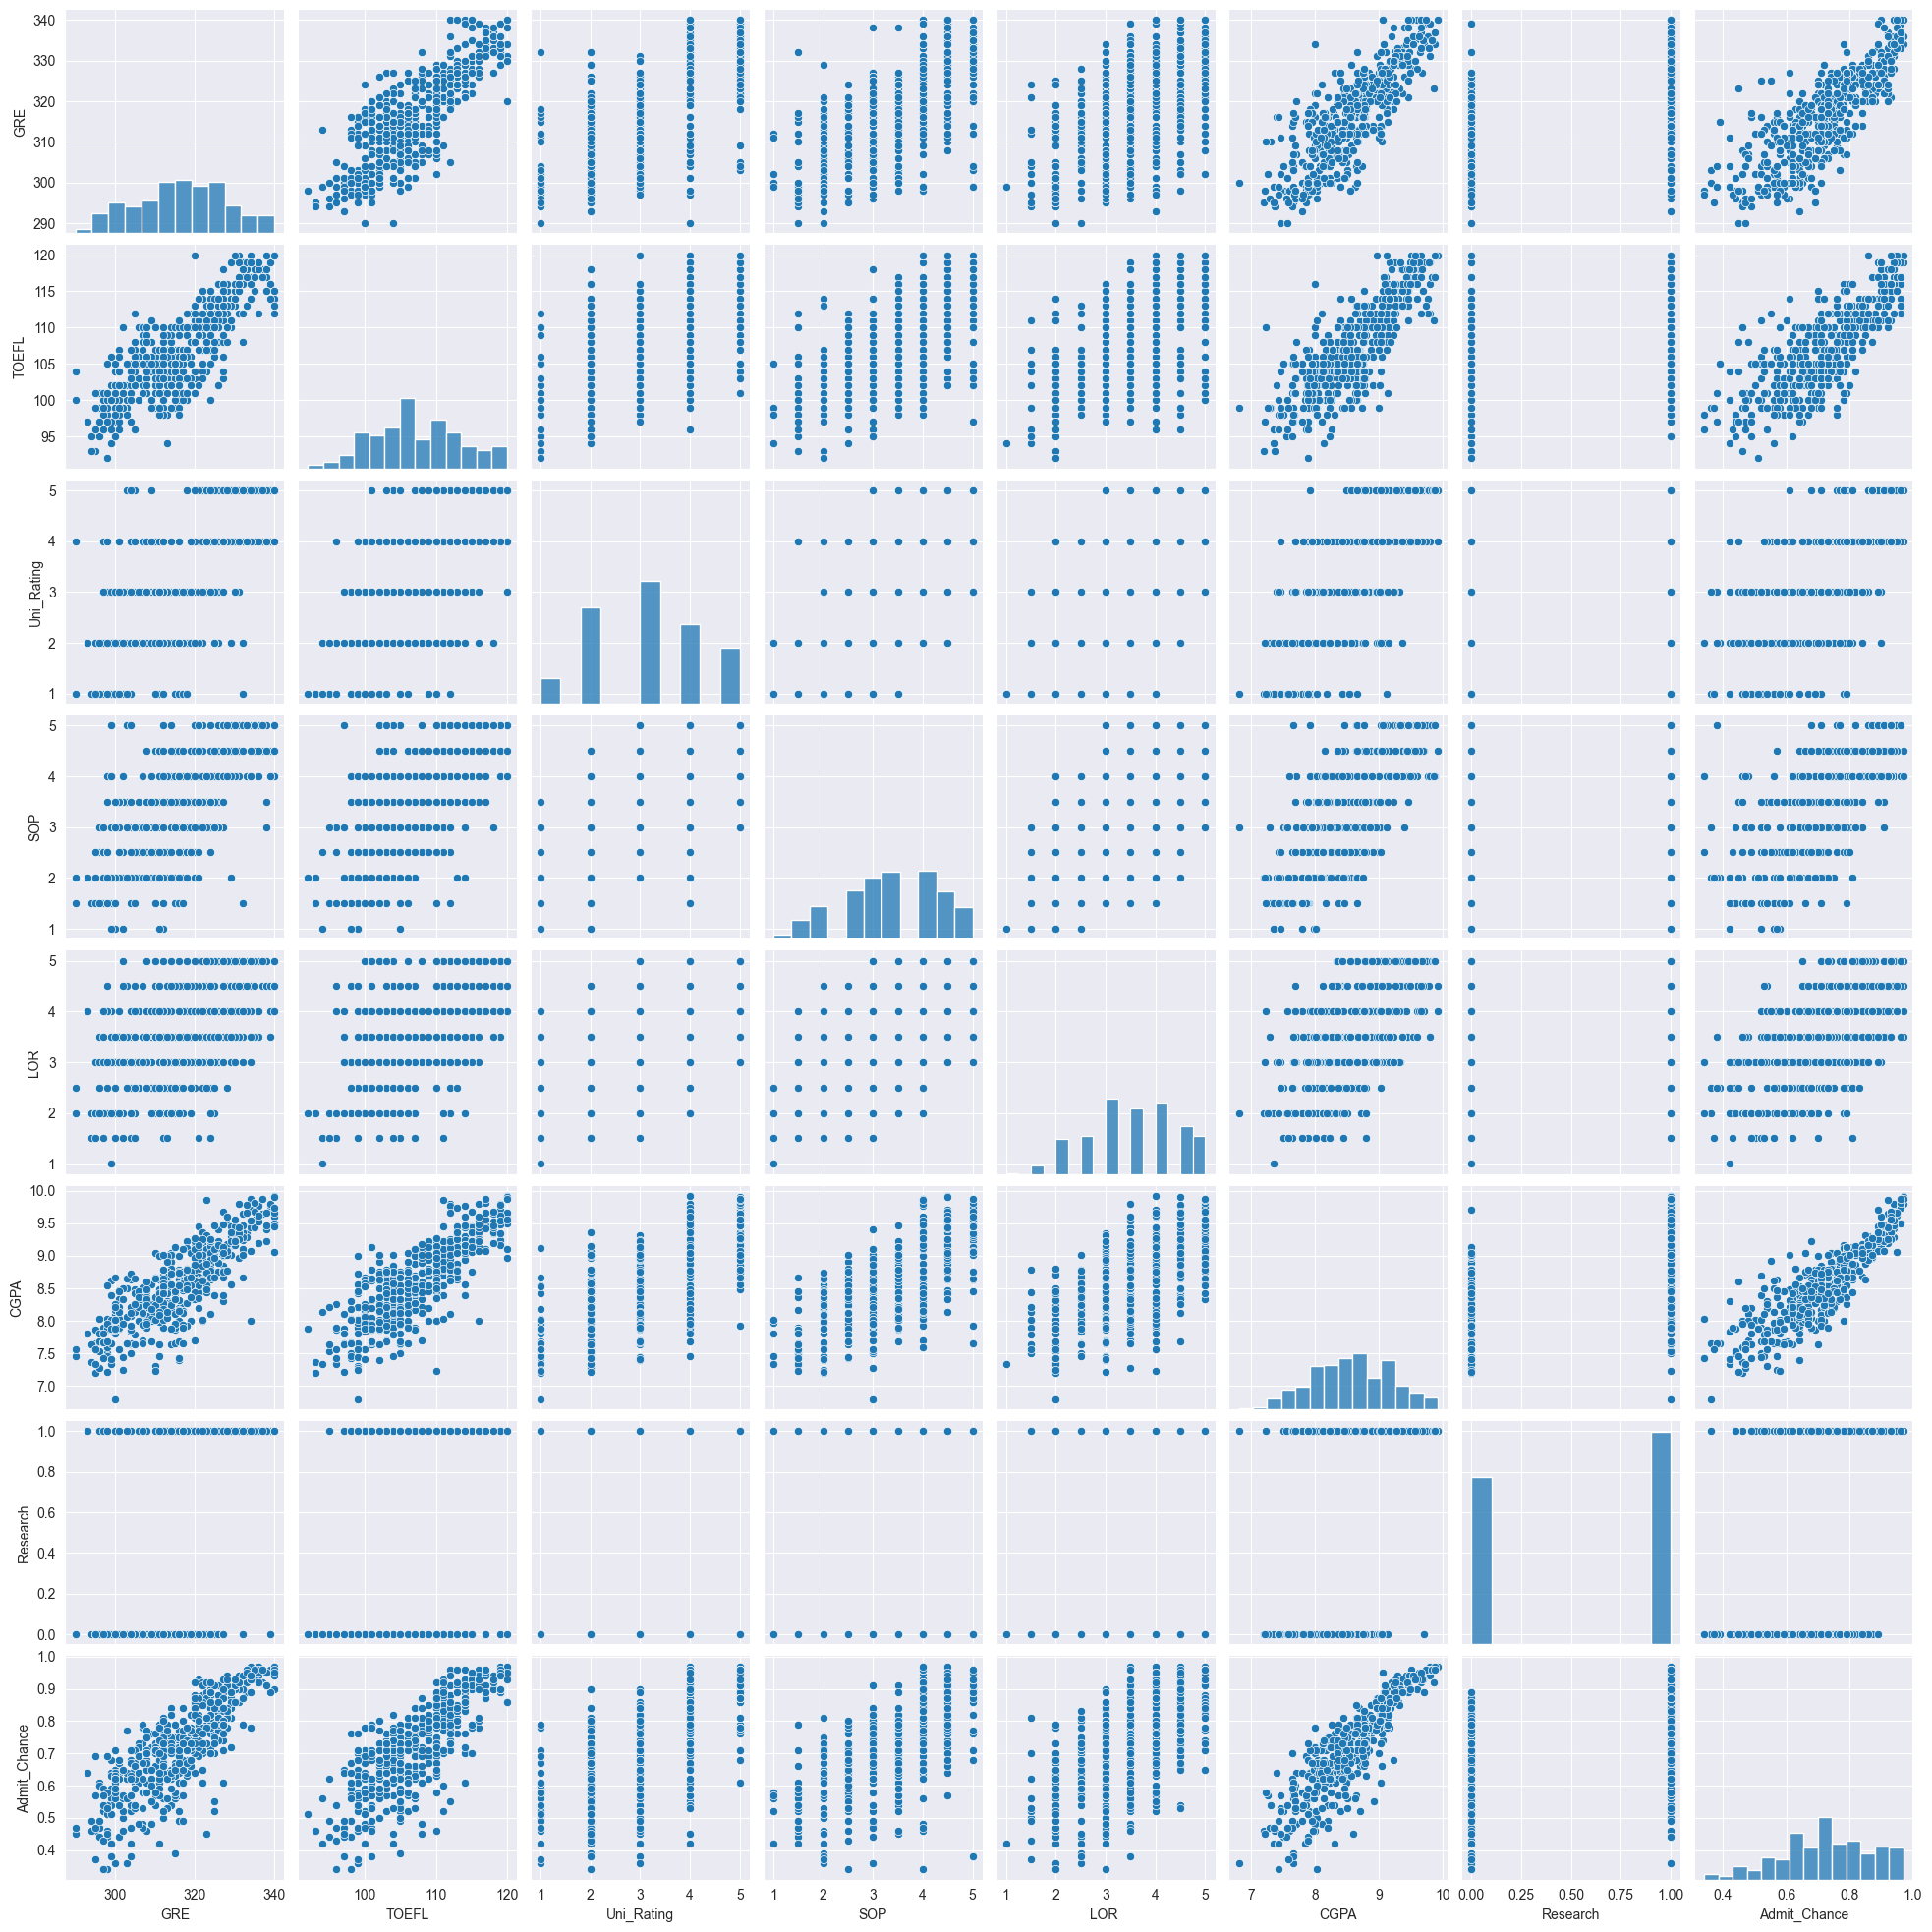

In [9]:
# Plot the distribution of the features
sns.pairplot(df)
plt.show()

## Data Scaling

In [10]:
# Scale numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data into a dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

## Data Splitting 

In [11]:
# Assuming 'Chance of Admit' is the target variable
X = df_scaled.drop('Admit_Chance', axis=1)
y = df_scaled['Admit_Chance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling
### Linear Regression

### Calculate the Feature Importance

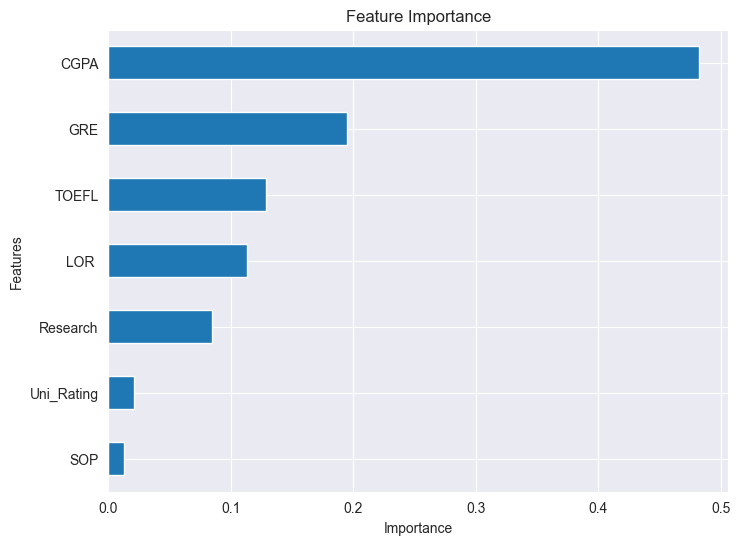

In [12]:
# Feature importance with Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature importance's
feature_importance = pd.Series(model.coef_, index=X_train.columns)
top_features = feature_importance.nlargest(5).index

# Select the top 5 features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Plot feature importance's
plt.figure(figsize=(8,6))
plt.title('Feature Importance')
feature_importance.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

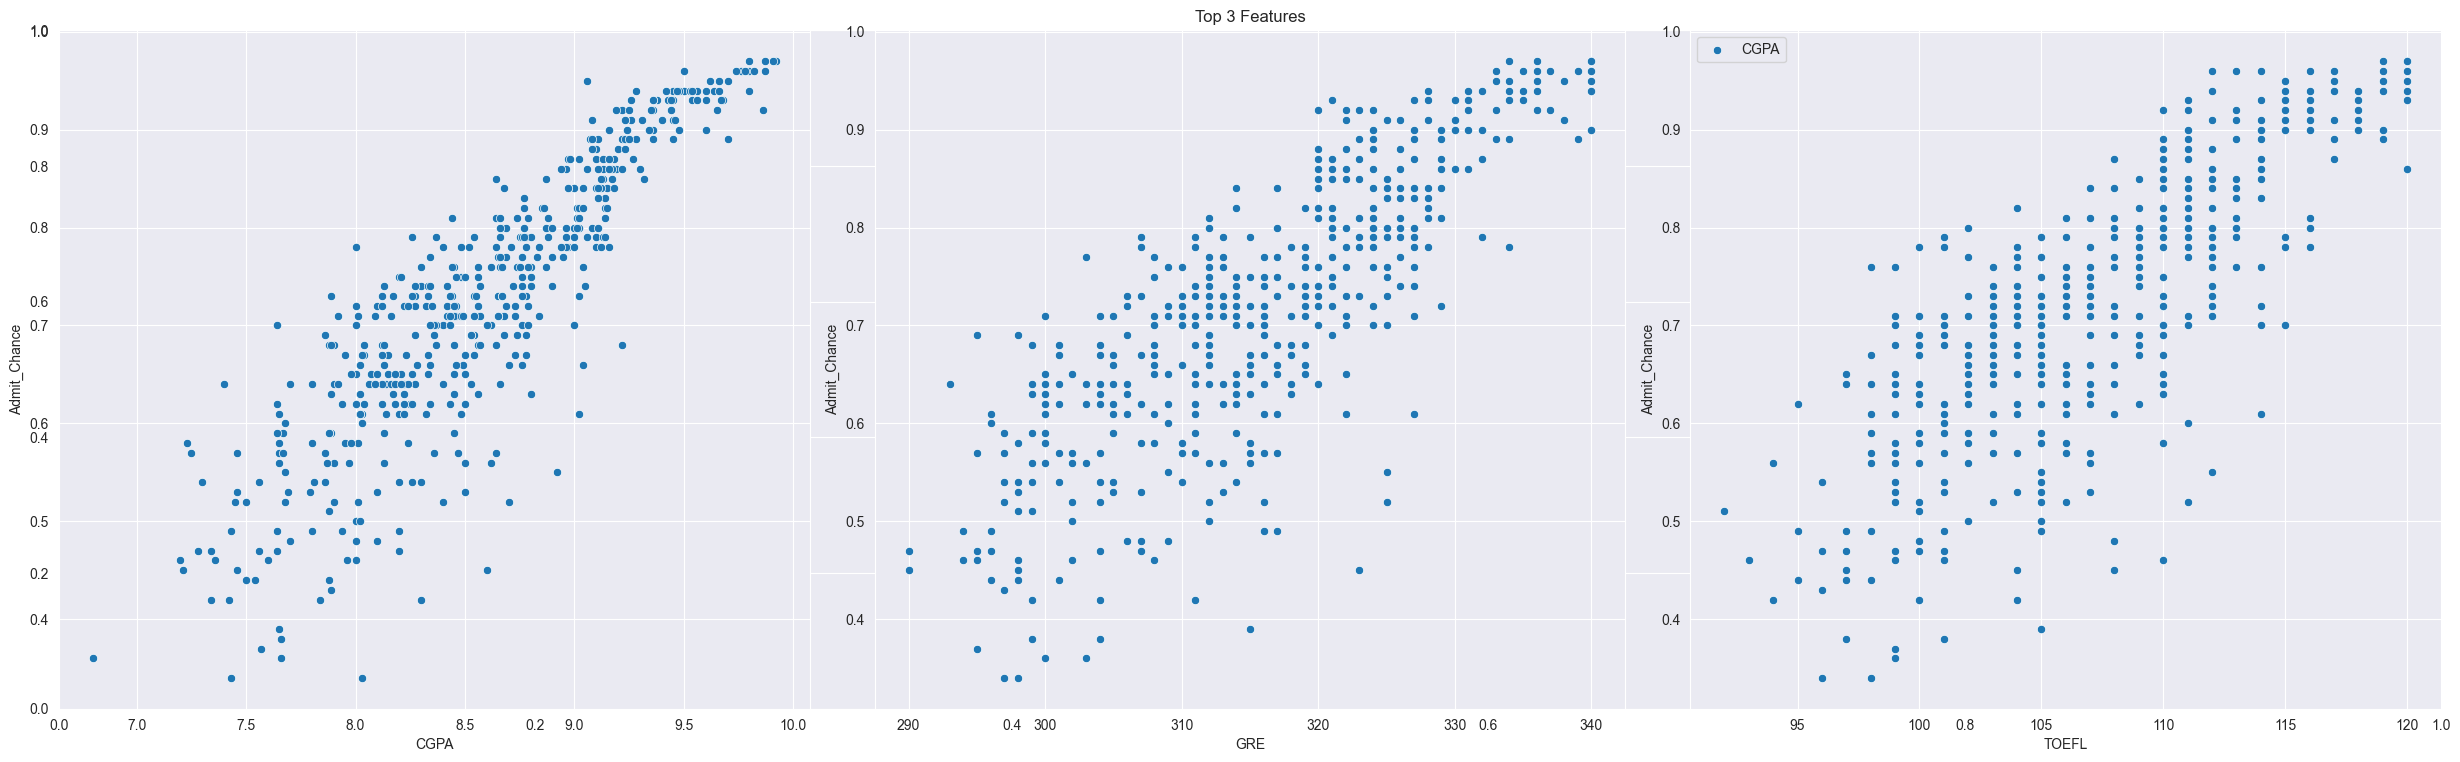

In [13]:
# Plot the top 3 features
plt.figure(figsize=(25,8))
plt.title('Top 3 Features')
plt.subplot(1,3,1)
sns.scatterplot(x='CGPA', y='Admit_Chance', data=df)
plt.subplot(1,3,2)
sns.scatterplot(x='GRE', y='Admit_Chance', data=df)
plt.subplot(1,3,3)
sns.scatterplot(x='TOEFL', y='Admit_Chance', data=df)

plt.legend(labels=['CGPA', 'GRE', 'TOEFL'])
plt.tight_layout()

plt.show()

### Fit the Model

In [14]:
# Fit the model
model = LinearRegression(fit_intercept=True)
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

### Evaluate the Model

In [15]:
# Evaluate the model
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Explained Variance Score: {explained_variance_score(y_test, y_pred)}')
print(f'Max Error: {max_error(y_test, y_pred)}')

Mean Absolute Error: 0.3044234147597456
Mean Squared Error: 0.18978240327910462
R-squared: 0.8155002070847485
Root Mean Squared Error: 0.43564022229255256
Explained Variance Score: 0.8168768859877761
Max Error: 1.9236919432884767


## Ridge Regression

In [16]:
# Define hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
# Perform grid search
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_selected)

### Evaluate the Model

In [17]:
# Evaluate the model
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Explained Variance Score: {explained_variance_score(y_test, y_pred)}')
print(f'Max Error: {max_error(y_test, y_pred)}')



Mean Absolute Error: 0.3067611627703719
Mean Squared Error: 0.19157991754867812
R-squared: 0.8137527267874799
Root Mean Squared Error: 0.43769843219810384
Explained Variance Score: 0.8150706115875539
Max Error: 1.9225683876132913


## Results and Conclusion

The Linear Regression model has a Mean Absolute Error of 0.304, Mean Squared Error of 0.189, R-squared of 0.815, Root Mean Squared Error of 0.436, Explained Variance Score of 0.817 and Max Error of 1.923.
The Ridge Regression model has a Mean Absolute Error of 0.307, Mean Squared Error of 0.191, R-squared of 0.813, Root Mean Squared Error of 0.438, Explained Variance Score of 0.815 and Max Error of 1.922.

The Model for predicting the chance of admission of a new student has been created using Linear Regression and Ridge Regression, they have the same performance, are good models for predicting the chance of admission of a new student based on the above parameters and can be improved by using more data.